In [9]:
import numpy as np

X = np.loadtxt("DATA_reg_lin.dat")

In [19]:
weight = X[:,1]
n = weight.size
display(weight)

array([165., 167., 180., 155., 212., 175., 190., 210., 200., 149., 158.,
       169., 170., 172., 159., 168., 174., 183., 215., 195., 180., 143.,
       240., 235., 192., 187.])

In [21]:
pressure = X[:,2]
display(pressure)

array([130., 133., 150., 128., 151., 146., 150., 140., 148., 125., 133.,
       135., 150., 153., 128., 132., 149., 158., 150., 163., 156., 124.,
       170., 165., 160., 159.])

In [23]:
media_peso = np.mean(weight)
media_press = np.mean(pressure)
#calcolo sigmaxy
sig = np.sum((weight-media_peso)*(pressure-media_press))/n
display(sig)

247.00887573964494

In [27]:
sig_x2 = np.sum((weight-media_peso)**2)/n
display(sig_x2)

588.9363905325444

In [31]:
#troviamo i coefficenti beta

b0 = media_press - (sig/sig_x2)*media_peso
display(b0)
b1 = sig/sig_x2
display(b1)

69.10437279118659

0.41941520291569645

In [33]:
x = np.linspace(140,240,1000)
y = b0+b1*x

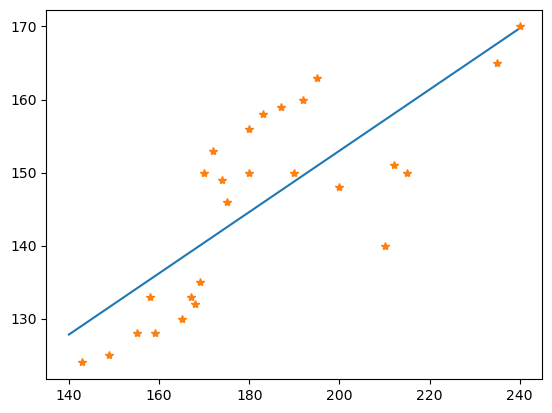

In [39]:
import matplotlib.pyplot as p

p.plot(x,y)
p.plot(weight,pressure,"*")
p.show()

In [47]:
#calcolo dei residui

y_hat = b0 + b1 * weight
#display(y_hat)
r = pressure - y_hat
#display(r)

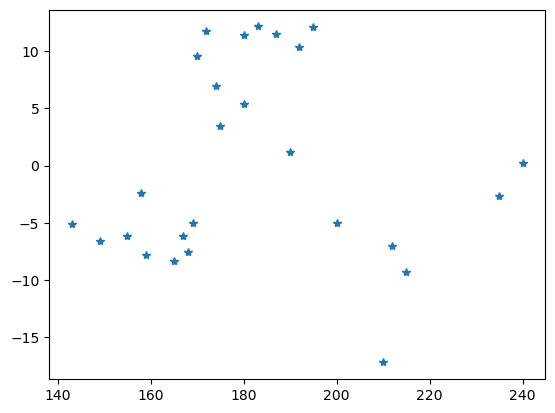

In [55]:
p.plot(weight,r,"*")
p.show()

In [57]:
s2 = np.sum(r**2)/(n-2)
display(s2)

75.35719270439562

In [65]:
#intervallo di confidenza per i coefficenti
from scipy.stats import t
alpha = 0.05
T = t.ppf(1-alpha/2,n-2)

b0sx = b0 - np.sqrt(s2)*np.sqrt(1/n+media_peso**2/(n*sig_x2))*T
b0dx = b0 + np.sqrt(s2)*np.sqrt(1/n+media_peso**2/(n*sig_x2))*T
print(b0sx," , ", b0dx)

42.45917560573429  ,  95.7495699766389


In [67]:
b1sx = b1 - np.sqrt(s2)/(np.sqrt(sig_x2)*np.sqrt(n))*T
b1dx = b1 + np.sqrt(s2)/(np.sqrt(sig_x2)*np.sqrt(n))*T
print(b1sx," , ", b1dx)

0.27462811448021235  ,  0.5642022913511806


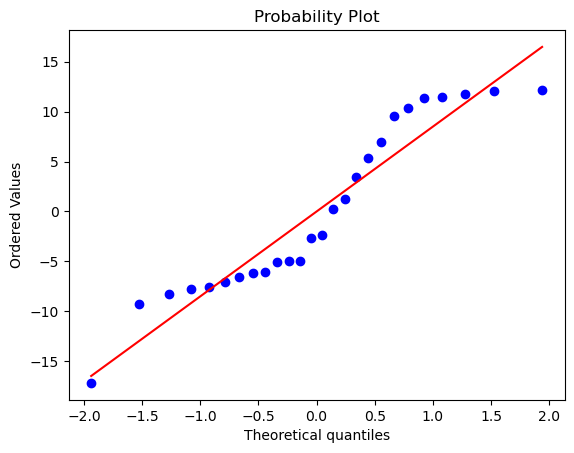

In [69]:
from scipy.stats import probplot
from scipy.stats import norm

probplot(r,dist=norm,plot = p)
p.show()